In [1]:
import pandas as pd

data_index = pd.read_csv('data/index.csv').drop(['Unnamed: 0'], axis=1)
data_additional = pd.read_csv('data/additional.csv')
data_index['Date_reported'] = pd.to_datetime(data_index['Date_reported'], dayfirst=True)
data_additional['Date'] = pd.to_datetime(data_additional['Date'], dayfirst=True)


In [2]:
data_additional['fully_vaccinated_ratio'] = data_additional['fully_vaccinated_ratio'].interpolate()
data_additional['partially_vaccinated_ratio'] = data_additional['partially_vaccinated_ratio'].interpolate()

In [3]:
import datetime
import pdb

delta = datetime.timedelta(days=13)

start_index = 10
end_index= 94
case_counts = 0

for index, row in data_additional.iterrows():
    if index >= start_index and index <= end_index:
        print(row['Date'].date())
        filtered_data_index = data_index[data_index['Date_reported'].dt.date <= row['Date'].date()]
        filtered_data_index = filtered_data_index[filtered_data_index['Date_reported'].dt.date >= row['Date'].date() - delta]
        # pdb.set_trace()
        print(filtered_data_index.shape)
        case_counts = filtered_data_index['New_community_isolation'].sum()
        case_counts += filtered_data_index['New_community_surveillance'].sum()
        print(case_counts)
        if pd.isna(row['not_vaccinated']):
            print('Missing vaccination data detected')
            fully_vaccinated_case_counts = case_counts * row['fully_vaccinated_ratio']
            partially_vaccinated_case_counts = case_counts * row['partially_vaccinated_ratio']
            data_additional.loc[index, 'fully_vaccinated'] = fully_vaccinated_case_counts
            data_additional.loc[index, 'partially_vaccinated'] = partially_vaccinated_case_counts
            data_additional.loc[index, 'not_vaccinated'] = case_counts - fully_vaccinated_case_counts - partially_vaccinated_case_counts
        print("")


2021-04-28
(14, 8)
22
Missing vaccination data detected

2021-04-29
(14, 8)
38
Missing vaccination data detected

2021-04-30
(14, 8)
45
Missing vaccination data detected

2021-05-01
(14, 8)
48
Missing vaccination data detected

2021-05-02
(14, 8)
61
Missing vaccination data detected

2021-05-03
(14, 8)
70
Missing vaccination data detected

2021-05-04
(14, 8)
75
Missing vaccination data detected

2021-05-05
(14, 8)
75
Missing vaccination data detected

2021-05-06
(14, 8)
76
Missing vaccination data detected

2021-05-07
(14, 8)
78
Missing vaccination data detected

2021-05-08
(14, 8)
80
Missing vaccination data detected

2021-05-09
(14, 8)
90
Missing vaccination data detected

2021-05-10
(14, 8)
92
Missing vaccination data detected

2021-05-11
(14, 8)
104
Missing vaccination data detected

2021-05-12
(14, 8)
111
Missing vaccination data detected

2021-05-13
(14, 8)
119
Missing vaccination data detected

2021-05-14
(14, 8)
134
Missing vaccination data detected

2021-05-15
(14, 8)
146
Miss

In [4]:
data_final = data_additional.loc[10:94]
data_final = data_final[['Date', 'GW', 'ICU', 'O2', 'retail_and_recreation_percent_change_from_baseline', 'not_vaccinated', 'partially_vaccinated', 'fully_vaccinated']]
data_final

,Date,GW,ICU,O2,retail_and_recreation_percent_change_from_baseline,not_vaccinated,partially_vaccinated,fully_vaccinated
10,2021-04-28,112.0,0.0,NaN,-16.0,15.882000,2.080000,4.038000
11,2021-04-29,110.0,0.0,NaN,-15.0,27.284000,3.610000,7.106000
12,2021-04-30,113.0,0.0,NaN,-9.0,32.134091,4.295455,8.570455
13,2021-05-01,112.0,0.0,NaN,-11.0,34.088727,4.603636,9.307636
14,2021-05-02,126.0,0.0,NaN,-11.0,43.082636,5.878182,12.039182
...,...,...,...,...,...,...,...,...
90,2021-07-17,195.0,1.0,5.0,-10.0,162.000000,127.000000,97.000000
91,2021-07-18,242.0,1.0,5.0,-14.0,185.000000,145.000000,135.000000
92,2021-07-19,288.0,1.0,5.0,NaN,246.000000,179.000000,190.000000
93,2021-07-20,331.0,1.0,5.0,NaN,225.000000,241.000000,316.000000


In [5]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

seed = 7
data_final_imp = data_final.drop(['Date'], axis=1)
imp = IterativeImputer(max_iter=10, random_state=seed)
data_final_imp_values = imp.fit_transform(data_final_imp.values)
data_final_imp = pd.DataFrame(data_final_imp_values, columns=data_final_imp.columns)

data_final_imp


,GW,ICU,O2,retail_and_recreation_percent_change_from_baseline,not_vaccinated,partially_vaccinated,fully_vaccinated
0,112.0,0.0,10.160879,-16.000000,15.882000,2.080000,4.038000
1,110.0,0.0,9.938701,-15.000000,27.284000,3.610000,7.106000
2,113.0,0.0,10.809235,-9.000000,32.134091,4.295455,8.570455
3,112.0,0.0,10.449969,-11.000000,34.088727,4.603636,9.307636
4,126.0,0.0,10.851578,-11.000000,43.082636,5.878182,12.039182
...,...,...,...,...,...,...,...
80,195.0,1.0,5.000000,-10.000000,162.000000,127.000000,97.000000
81,242.0,1.0,5.000000,-14.000000,185.000000,145.000000,135.000000
82,288.0,1.0,5.000000,-33.892176,246.000000,179.000000,190.000000
83,331.0,1.0,5.000000,-82.920126,225.000000,241.000000,316.000000


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

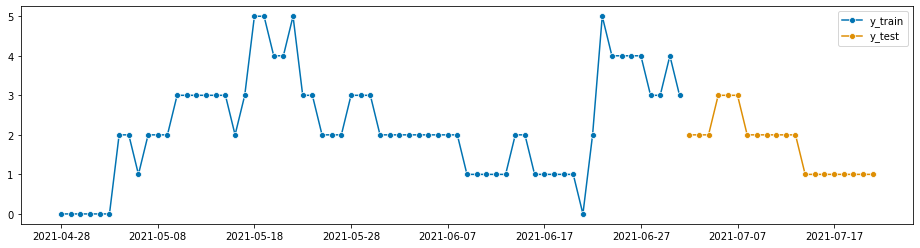

In [6]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.ets import AutoETS
from sktime.utils.plotting import plot_series

y = pd.Series(data=data_final['ICU'].values, index=pd.to_datetime(data_final['Date'].values))
y.index = y.index.to_period('D')

from sktime.forecasting.model_selection import temporal_train_test_split

y = y + 1

y_train, y_test = temporal_train_test_split(y, test_size=20)

plot_series(y_train-1, y_test-1, labels=["y_train", "y_test"])



(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

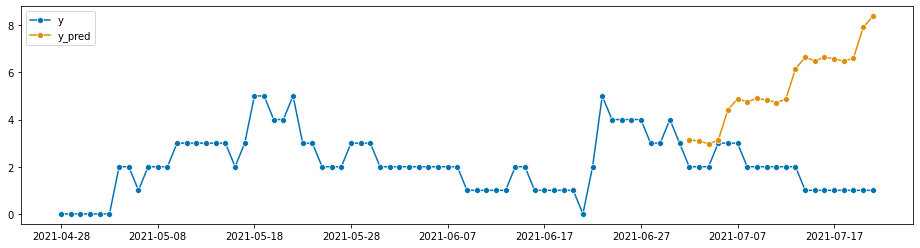

In [7]:
fh = ForecastingHorizon(y_test.index, is_relative=False)

forecaster = AutoETS(auto=True, sp=7, n_jobs=-1)
forecaster.fit(y_train)


# y_pred will contain the predictions
y_pred = forecaster.predict(fh)

plot_series(y-1, y_pred-1, labels=["y", "y_pred"])

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

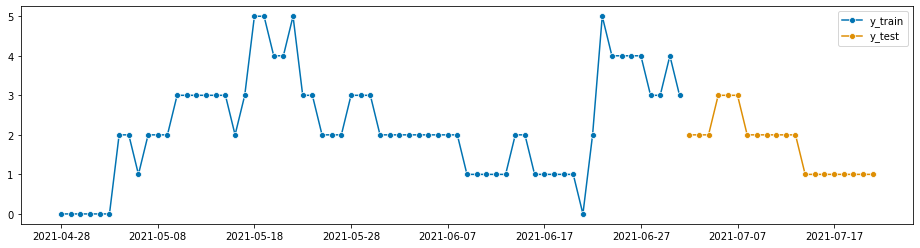

In [12]:
from sktime.datasets import load_airline
from sktime.forecasting.arima import AutoARIMA


y = pd.Series(data=data_final['ICU'].values, index=pd.to_datetime(data_final['Date'].values))
y.index = y.index.to_period('D')

from sktime.forecasting.model_selection import temporal_train_test_split

y = y
y_train, y_test = temporal_train_test_split(y, test_size=20)

plot_series(y_train, y_test, labels=["y_train", "y_test"])


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

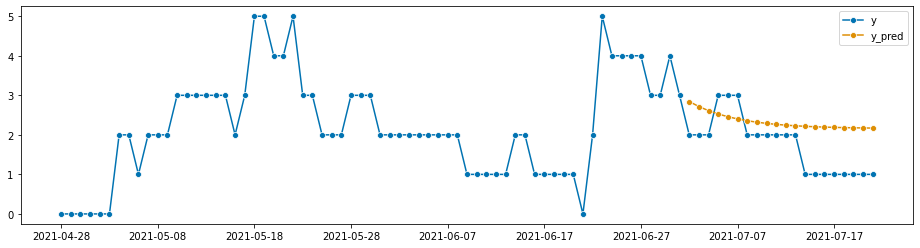

/home/llja/anaconda3/envs/icu_pred/lib/python3.8/site-packages/statsmodels/tsa/exponential_smoothing/ets.py:1135: RuntimeWarning: invalid value encountered in log
  logL -= np.sum(np.log(yhat))
/home/llja/anaconda3/envs/icu_pred/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/llja/anaconda3/envs/icu_pred/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [14]:
fh = ForecastingHorizon(y_test.index, is_relative=False)

forecaster = AutoARIMA(sp=7, suppress_warnings=True)
forecaster.fit(y_train)

# y_pred will contain the predictions
y_pred = forecaster.predict(fh)

plot_series(y, y_pred, labels=["y", "y_pred"])

In [79]:
y_pred

2021-07-02    122.481834
2021-07-03    121.266957
2021-07-04    120.295055
2021-07-05    119.517533
2021-07-06    118.895516
2021-07-07    118.397902
2021-07-08    117.999811
2021-07-09    117.681338
2021-07-10    117.426560
2021-07-11    117.222737
2021-07-12    117.059679
2021-07-13    116.929233
2021-07-14    116.824876
2021-07-15    116.741390
2021-07-16    116.674601
2021-07-17    116.621170
2021-07-18    116.578426
2021-07-19    116.544230
2021-07-20    116.516873
2021-07-21    116.494988
Freq: D, dtype: float64

In [29]:
dir(forecaster)

['_X',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_all_tags',
 '_check_n_features',
 '_compute_pred_err',
 '_compute_pred_int',
 '_cutoff',
 '_detached_cutoff',
 '_fh',
 '_fit',
 '_fit_forecaster',
 '_fitted_forecaster',
 '_fitted_param_names',
 '_forecaster',
 '_get_fitted_param_names',
 '_get_param_names',
 '_get_pred_int',
 '_get_tags',
 '_get_y_pred',
 '_is_fitted',
 '_more_tags',
 '_predict',
 '_predict_moving_cutoff',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_cutoff',
 '_set_fh',
 '_set_y_X',
 '_tags',
 '_update',
 '_update_X',
 '_update_predict_single',
 '_update_y_X',
 '_validate_data',
 '_y',
 'ad

In [69]:
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster

In [70]:
# step 1: data specification
y = load_airline()

# step 2: specifying forecasting horizon
fh = np.arange(1, 37)

# step 3: specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="last", sp=12)

# step 4: fitting the forecaster
forecaster.fit(y)

# step 5: querying predictions
y_pred = forecaster.predict(fh)

In [72]:
# December 1957

# this is the data known in December 1975
y_1957Dec = y[:-36]

# step 1: specifying the forecasting strategy
forecaster = AutoETS(auto=True, sp=12, n_jobs=-1)

# step 2: specifying the forecasting horizon: one year ahead, all months
fh = np.arange(1, 13)

# step 3: this is the first time we use the model, so we fit it
forecaster.fit(y_1957Dec)

# step 4: obtaining the first batch of forecasts for Jan 1958 - Dec 1958
y_pred_1957Dec = forecaster.predict(fh)


(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

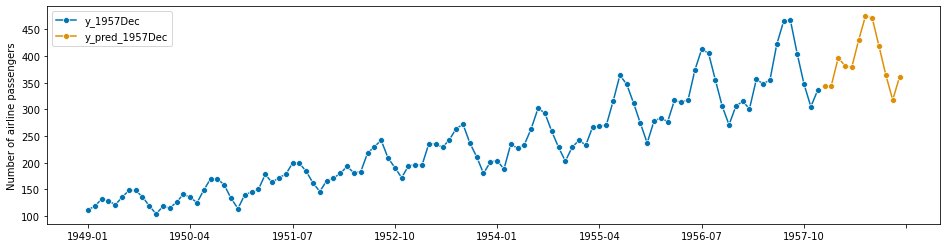

In [73]:
# plotting predictions and past data
plot_series(y_1957Dec, y_pred_1957Dec, labels=["y_1957Dec", "y_pred_1957Dec"])

In [29]:
from sktime.datasets import load_longley
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.compose import ForecastingPipeline
from sktime.transformations.series.impute import Imputer
from sktime.transformations.series.adapt import TabularToSeriesAdaptor
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sklearn.preprocessing import MinMaxScaler
y, X = load_longley()
y_train, _, X_train, X_test = temporal_train_test_split(y, X)
fh = ForecastingHorizon(X_test.index, is_relative=False)
pipe = ForecastingPipeline(steps=[
("imputer", Imputer(method="mean")),
("minmaxscaler", TabularToSeriesAdaptor(MinMaxScaler())),
("forecaster", NaiveForecaster(strategy="drift"))])
pipe.fit(y_train, X_train)
# ForecastingPipeline(...)
y_pred = pipe.predict(fh=fh, X=X_test)

In [30]:
y_pred


1959    67075.727273
1960    67638.454545
1961    68201.181818
1962    68763.909091
Freq: A-DEC, dtype: float64